In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.io as sio

         X1        X2
0  1.842080  4.607572
1  5.658583  4.799964
2  6.352579  3.290854
3  2.904017  4.612204
4  3.231979  4.939894


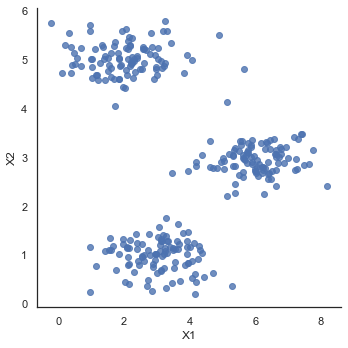

In [31]:
mat = sio.loadmat('data/ex7data2.mat')
data2 = pd.DataFrame(mat.get('X'), columns = ['X1', 'X2'])
print(data2.head())

sns.set(context = 'notebook', style = "white")
sns.lmplot(x = 'X1', y = 'X2', data = data2, fit_reg = False)
plt.show()

# 0. random init

for initial centroids

In [32]:
def combine_data_C(data, C):
    data_with_c = data.copy()
    data_with_c['C'] = C
    return data_with_c

In [33]:
# k-means fn -------------------------
def random_init(data, k):
    """choose k sample from data set as init centroids
    Args:
        data: DataFrame
        k: int
    Returns:
        k samples: ndarray 
    """
    return data.sample(k).values

In [48]:
def _find_your_cluster(x, centroids):
    """find the right cluster for x with respect to shortest distance
    Args:
        x: ndarray (n, ) -> n features
        centroids: ndarray (k, n)
    Returns:
        k: int
    """
    distances = np.apply_along_axis(func1d =  np.linalg.norm, # this give you l2 norm
                                   axis = 1,
                                   arr = centroids - x) # use ndarray's broadcast
    return np.argmin(distances)

In [35]:
def assign_cluster(data, centroids):
    """assign cluster for each node in data
    return C ndarray
    """
    return np.apply_along_axis(lambda x: _find_your_cluster(x, centroids), axis = 1, arr = data.values)
    

In [53]:
def new_centroids(data, C):
    data_with_c = combine_data_C(data, C)
    # return data_with_c.groupby("C").mean().sort_values(by = 'C').drop('C', axis = 1).values
    return data_with_c.groupby("C").mean().values

In [58]:
def cost(data, centroids, C):
    m = data.shape[0]
    distance = np.apply_along_axis(func1d = np.linalg.norm, axis = 1, arr = data.values - centroids[C])
    return distance.sum()/m

In [56]:
def _k_means_iter(data, k, epoch = 100, tol = 0.0001):
    """one shot k-means
    with early break
    """
    centroids = random_init(data, k)
    cost_progress = []
    
    for i in range(epoch):
        print("running epoch {}".format(i))
        
        C = assign_cluster(data, centroids)
        centroids = new_centroids(data, C)
        cost_progress.append(cost(data, centroids, C))
        
        if len(cost_progress) > 1:
            if np.abs(cost_progress[-1] - cost_progress[-2])/cost_progress[-1] < tol:
                break
    return C, centroids, cost_progress[-1]
        

In [81]:
def k_means(data, k, epoch = 100, n_init = 10):
    """do multiple random init and pick the best one to return
    Args:
        data (pd.DataFrame)
    Returns:
        (C, centroids, least_cost)
    """
    tries = np.array([_k_means_iter(data, k, epoch) for _ in range(n_init)], dtype=object)
    return tries[np.argmin(tries[:,-1])]

In [40]:
random_init(data2, 3)

array([[2.28664839, 5.0076699 ],
       [3.96162465, 2.72025046],
       [0.95311627, 5.58037108]])

# 1. cluster assignment

https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point

# find closest cluster experiment

In [41]:
init_centroids = random_init(data2, 3)
init_centroids

array([[2.73911908, 1.10072284],
       [5.74036233, 3.10391306],
       [3.2645514 , 1.3836869 ]])

In [42]:
x = np.array([1, 1])

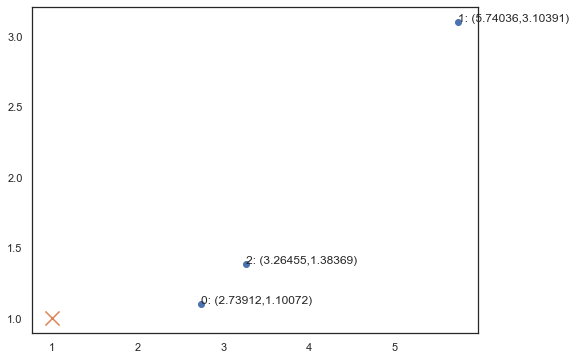

In [46]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(x = init_centroids[:,0], y = init_centroids[:,1])

for i, node in enumerate(init_centroids):
    ax.annotate('{}: ({:.5f},{:.5f})'.format(i, node[0], node[1]), node)

ax.scatter(x[0], x[1], marker = 'x', s = 200)
plt.show()

In [49]:
_find_your_cluster(x, init_centroids)

0

# 1 epoch cluster assigning

In [50]:
C = assign_cluster(data2, init_centroids)
data_with_c = combine_data_C(data2, C)
data_with_c.head()

,X1,X2,C
0,1.842080,4.607572,2
1,5.658583,4.799964,1
2,6.352579,3.290854,1
3,2.904017,4.612204,1
4,3.231979,4.939894,1


See the first round clustering result

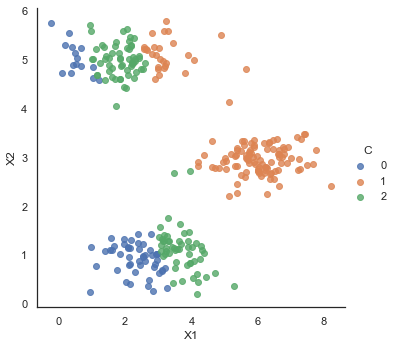

In [51]:
sns.lmplot(x = 'X1', y = 'X2', hue = 'C', data = data_with_c, fit_reg = False)
plt.show()

# 2. calculate new centroid

In [54]:
new_centroids(data2, C)

array([[1.90730252, 1.87760966],
       [5.44610306, 3.42299297],
       [2.72506694, 3.13593783]])

# putting all together, take1

this is just 1 shot `k-means`, if the random init pick the bad starting centroids, the final clustering may be very sub-optimal

In [66]:
final_C, final_centroid, _ = _k_means_iter(data2, 3)
data_with_c = combine_data_C(data2, final_C)

running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 7


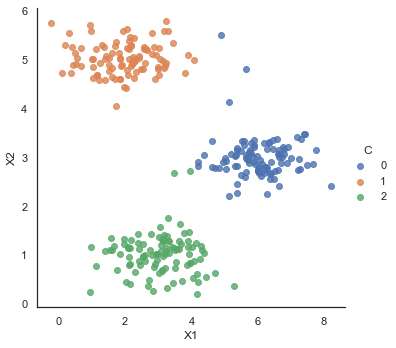

In [67]:
sns.lmplot(x = 'X1', y = 'X2', hue = 'C', data = data_with_c, fit_reg = False)
plt.show()

# calculate the cost

In [68]:
cost(data2, final_centroid, final_C)

0.794176363371587

# k-mean with multiple tries of random init, pick the best one with least cost

In [82]:
best_C, best_centroids, least_cost = k_means(data2, 3)

running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5


In [83]:
least_cost

0.794176363371587

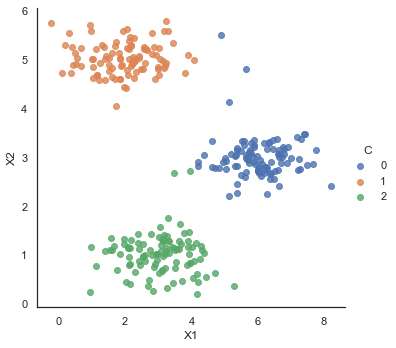

In [85]:
data_with_c = combine_data_C(data2, best_C)
sns.lmplot(x = 'X1', y = 'X2', hue = 'C', data = data_with_c, fit_reg = False)
plt.show()

# try sklearn kmeans

In [86]:
from sklearn.cluster import KMeans

In [87]:
sk_kmeans = KMeans(n_clusters = 3)

In [88]:
sk_kmeans.fit(data2)

KMeans(n_clusters=3)

In [89]:
sk_C = sk_kmeans.predict(data2)

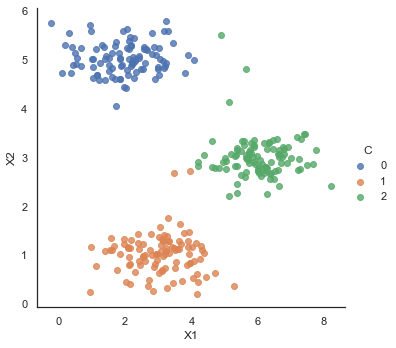

In [90]:
data_with_c = combine_data_C(data2, sk_C)
sns.lmplot(x = 'X1', y = 'X2', hue = 'C', data = data_with_c, fit_reg = False)
plt.show()